# Robot Data Analysis

### Konwersja danych

1. **Importowanie funkcji konwersji**:
   ```python
   from converter import convert_txt_to_csv
   ```
   Importowanie funkcji `convert_txt_to_csv` z pliku `converter.py`.

2. **Konwersja pliku tekstowego na CSV**:
   ```python
   convert_txt_to_csv("data", "data")
   ```
   Wywołanie funkcji `convert_txt_to_csv` z argumentami:
   - `input_name`: `"data"` - nazwa pliku wejściowego bez rozszerzenia (przyjmuje się, że istnieje plik `"data.txt"`).
   - `output_name`: `"data"` - nazwa pliku wyjściowego bez rozszerzenia (wynikowy plik będzie `"data.csv"`).

### Opis kodu w pliku `converter.py`

1. **Konwersja pliku tekstowego na plik CSV**:
   ```python
   import csv

   def convert_txt_to_csv(input_name, output_name, LIMIT: int = 0):
       with open(input_name + ".txt", "r") as in_file:
           lines = [line.strip().split("\t") for line in in_file if line.strip()]
           if LIMIT > 0:
               lines = lines[:LIMIT]
           with open(output_name + ".csv", "w", newline="") as out_file:
               writer = csv.writer(out_file)
               writer.writerows(lines)
   ```
   Funkcja `convert_txt_to_csv` wykonuje konwersję pliku tekstowego (`input_name + ".txt"`) na plik CSV (`output_name + ".csv"`). Parametr `LIMIT` opcjonalnie ogranicza liczbę wierszy do przetworzenia. Plik wejściowy jest odczytywany linia po linii, dzielony na kolumny przez znak tabulacji (`"\t"`), a następnie zapisywany do pliku CSV przy użyciu modułu `csv`.

2. **Uruchomienie funkcji konwersji**:
   ```python
   if __name__ == "__main__":
       convert_txt_to_csv("data", "data")
   ```
   Fragment kodu sprawdza, czy plik `converter.py` jest uruchamiany bezpośrednio (a nie importowany jako moduł). Jeśli tak, funkcja `convert_txt_to_csv("data", "data")` jest automatycznie wywoływana, konwertując plik `"data.txt"` na `"data.csv"` bez limitu liczby wierszy.

In [144]:
from converter import convert_txt_to_csv

convert_txt_to_csv("Dane0002-Volt", "data")

### Import danych

1. **Importowanie bibliotek**:
   ```python
   import pandas as pd
   ```
   Importowanie biblioteki `pandas` do obsługi struktur danych DataFrame.

2. **Wczytanie danych**:
   ```python
   file_path = 'data.csv'
   df = pd.read_csv(file_path, names=['z_V', 'y_V', 'x_V'])
   ```
   Wczytanie danych z pliku CSV do DataFrame i zdefiniowanie nazw kolumn jako `'z_V'`, `'y_V'` oraz `'x_V'`.

3. **Dodanie kolumny czasu**:
   ```python
   samples_rate = 500 # czas próbkowania w Hz
   df['t_s'] = df.index / samples_rate  # 500 Hz = 0.002s
   ```
   Dodanie kolumny `'t_s'` reprezentującej czas w sekundach. Częstotliwość próbkowania wynosi 500 Hz, co oznacza, że każda próbka jest pobierana co 0.002 sekundy.

4. **Przeliczenie wartości na milimetry**:
   ```python
   df['z_mm'] = df['z_V'] / 0.1  # 1V/cm = 0.1V/mm
   df['y_mm'] = df['y_V'] / 0.143  # 1.43V/cm = 0.143V/mm
   df['x_mm'] = df['x_V'] / 0.143  # 1.43V/cm = 0.143V/mm
   ```
   Przeliczenie wartości z czujników (w woltach) na milimetry:
   - `'z_V'` przeliczane jest na `'z_mm'` według przelicznika 1V/cm (czyli 0.1V/mm).
   - `'y_V'` i `'x_V'` przeliczane są na `'y_mm'` i `'x_mm'` według przelicznika 1.43V/cm (czyli 0.143V/mm).

5. **Wyświetlenie DataFrame**:
   ```python
   display(df)
   ```
   Wyświetlenie DataFrame z przeliczoną wartością w milimetrach.


In [145]:
import pandas as pd

# Ścieżka do pliku z danymi
file_path = 'data.csv'

# Wczytanie danych z pliku CSV do DataFrame, zdefiniowanie nazw kolumn
df = pd.read_csv(file_path, names=['z_V', 'y_V', 'x_V'])

# Dodanie kolumny 't_s' reprezentującej czas w sekundach, przy założeniu częstotliwości próbkowania 500 Hz (0.002s)
samples_rate = 500 # czas próbkowania w Hz
df['t_s'] = df.index / samples_rate  # 500 Hz = 0.002s

# Przeliczenie wartości z czujników na milimetry
df['z_mm'] = df['z_V'] / 0.1  # 1V/cm = 0.1V/mm
df['y_mm'] = df['y_V'] / 0.143  # 1.43V/cm = 0.143V/mm
df['x_mm'] = df['x_V'] / 0.143  # 1.43V/cm = 0.143V/mm

# Wyświetlenie DataFrame z przeliczoną wartością w milimetrach
display(df)


,z_V,y_V,x_V,t_s,z_mm,y_mm,x_mm
0,-1.8844,3.3268,6.8920,0.000,-18.844,23.264336,48.195804
1,-1.8816,3.3272,6.8944,0.002,-18.816,23.267133,48.212587
2,-1.8820,3.3276,6.8944,0.004,-18.820,23.269930,48.212587
3,-1.8820,3.3244,6.8928,0.006,-18.820,23.247552,48.201399
4,-1.8820,3.3260,6.8924,0.008,-18.820,23.258741,48.198601
...,...,...,...,...,...,...,...
1048878,-2.1968,3.4760,6.8960,2097.756,-21.968,24.307692,48.223776
1048879,-2.1968,3.4776,6.8940,2097.758,-21.968,24.318881,48.209790
1048880,-2.1980,3.4748,6.8932,2097.760,-21.980,24.299301,48.204196
1048881,-2.1980,3.4760,6.8948,2097.762,-21.980,24.307692,48.215385


### Stworzenie wykresu

1. **Importowanie biblioteki do tworzenia wykresów**:
   ```python
   import matplotlib.pyplot as plt
   ```
   Importowanie modułu `matplotlib.pyplot` jako `plt` do tworzenia wykresów.

2. **Ustawienie rozmiaru figury wykresu**:
   ```python
   scale = 15
   fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)
   ```
   Ustawienie rozmiaru figury wykresu w milimetrach. Skala `15` oznacza, że figura będzie miała rozmiar A4 poziomo, gdzie szerokość wynosi 297 mm, a wysokość 210 mm.

3. **Tworzenie wykresu liniowego dla danych x, y i z w milimetrach**:
   ```python
   plt.plot(df['t_s'], df['x_mm'], label='x_mm')
   plt.plot(df['t_s'], df['y_mm'], label='y_mm')
   plt.plot(df['t_s'], df['z_mm'], label='z_mm')
   ```
   Tworzenie trzech serii danych na wykresie liniowym:
   - `df['t_s']` jako oś x (czas w sekundach).
   - `df['x_mm']`, `df['y_mm']`, `df['z_mm']` jako osie y (przemieszczenia w milimetrach dla osi x, y i z).

4. **Ustawienie etykiet osi i tytułu**:
   ```python
   plt.xlabel('Czas [s]')
   plt.ylabel('Przemieszczenie [mm]')
   plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym')
   ```
   Dodanie etykiet do osi x i y oraz tytułu wykresu.

5. **Dodanie legendy**:
   ```python
   plt.legend()
   ```
   Dodanie legendy do wykresu na podstawie nazw serii danych (`'x_mm'`, `'y_mm'`, `'z_mm'`).

6. **Zapisanie wykresu jako plik SVG w wysokiej rozdzielczości (800 DPI)**:
   ```python
   plt.savefig('wykres_mm.svg', format='svg', dpi=800)
   ```
   Zapisanie wykresu do pliku SVG o nazwie `'wykres_mm.svg'` w wysokiej rozdzielczości (800 DPI), co zapewnia dobrą jakość graficzną wykresu.

7. **Wyświetlenie wykresu (opcjonalne)**:
   ```python
   plt.show()
   ```
   Opcjonalne wyświetlenie wygenerowanego wykresu na ekranie (przydatne, jeśli chcemy zobaczyć wykres w notatniku lub interaktywnie).

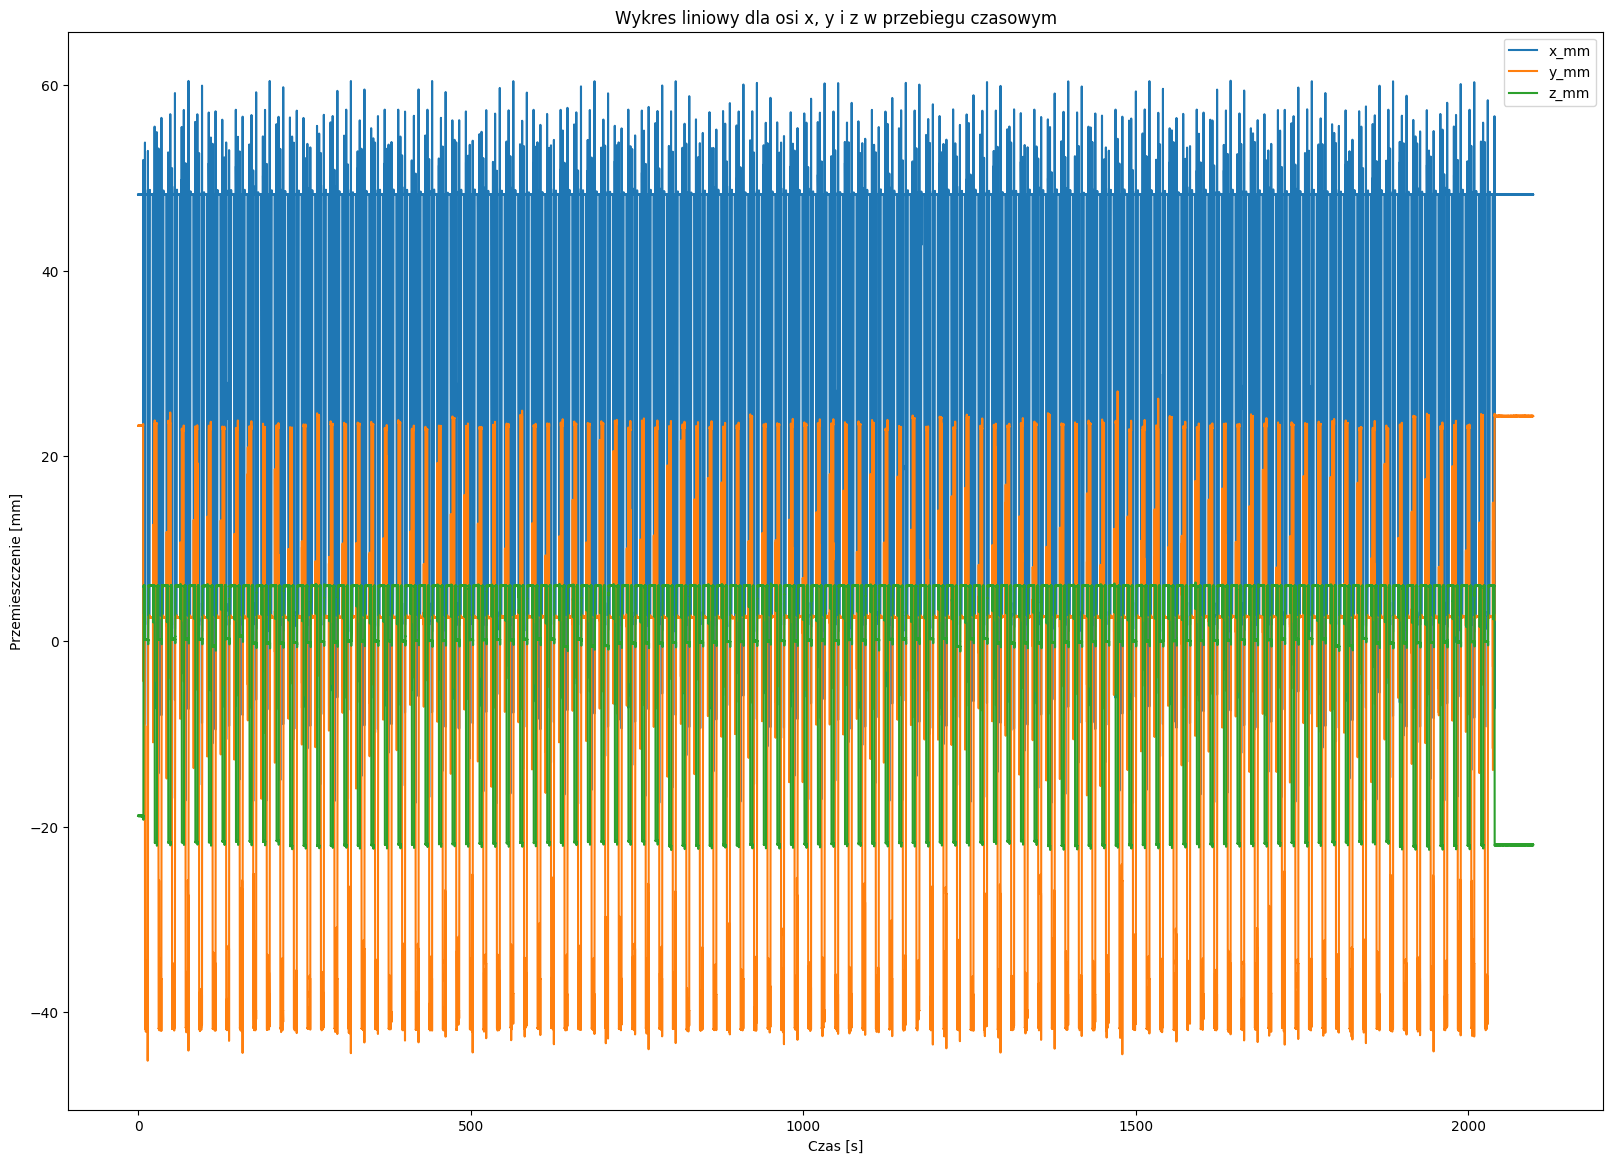

In [146]:
import matplotlib.pyplot as plt

# Ustawienie rozmiaru figury w milimetrach (rozmiar A4 poziomo)
scale = 15
fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)

# Tworzenie wykresu liniowego
plt.plot(df['t_s'], df['x_mm'], label='x_mm')
plt.plot(df['t_s'], df['y_mm'], label='y_mm')
plt.plot(df['t_s'], df['z_mm'], label='z_mm')

# Ustawienie etykiet osi i tytułu
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [mm]')
plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym')

# Dodanie legendy
plt.legend()

# Zapisanie wykresu jako SVG w wysokiej rozdzielczości (800 DPI)
plt.savefig('wykres_mm.svg', format='svg', dpi=800)

# Wyświetlenie wykresu (opcjonalne, jeśli chcemy zobaczyć wykres w notatniku)
plt.show()

### Oczyszczenie danych z błędów pomiarowych

1. **Określenie progu zmian (np. 10 mm)**:
   ```python
   threshold = 0.3
   ```
   Zdefiniowanie progu `threshold` na poziomie 0.3 mm. Ten próg będzie używany do identyfikacji punktów danych, które różnią się od swoich poprzedników o więcej niż 0.3 mm.

2. **Obliczenie różnic pomiędzy kolejnymi punktami danych**:
   ```python
   diff_x = df['x_mm'].diff().abs()
   diff_y = df['y_mm'].diff().abs()
   diff_z = df['z_mm'].diff().abs()
   ```
   Obliczenie wartości bezwzględnych różnic pomiędzy kolejnymi wartościami dla każdej z osi x (`'x_mm'`), y (`'y_mm'`) i z (`'z_mm'`) przekonwertowanych wcześniej na milimetry. Dzięki temu otrzymujemy informację o zmianie wartości między kolejnymi punktami.

3. **Identyfikacja wierszy do usunięcia**:
   ```python
   to_remove = (diff_x > threshold) | (diff_y > threshold) | (diff_z > threshold)
   ```
   Stworzenie maski logicznej `to_remove`, która określa, które wiersze zawierają wartości różnic większe niż ustalony `threshold` dla każdej osi (`'x_mm'`, `'y_mm'`, `'z_mm'`). Wiersze te zostaną oznaczone jako do usunięcia.

4. **Usunięcie wierszy zawierających błędy przetwarzania czujników**:
   ```python
   df_cleaned = df[~to_remove]
   ```
   Stworzenie nowego DataFrame `df_cleaned`, który zawiera tylko te wiersze z pierwotnego DataFrame `df`, które nie są oznaczone jako do usunięcia (czyli `~to_remove`).

5. **Wyświetlenie oczyszczonego DataFrame**:
   ```python
   display(df_cleaned)
   ```
   Wyświetlenie oczyszczonego DataFrame `df_cleaned`, który zawiera dane po usunięciu wierszy, gdzie wystąpiły błędy przetwarzania czujników.

### Uwagi

- Kod wykonuje proces detekcji i usuwania punktów danych, które wykazują znaczące zmiany (przekraczające próg `threshold`). Jest to przydatne do eliminacji przypadkowych błędów pomiarowych lub szumów w danych z czujników.
- Oczyszczone dane są przechowywane w DataFrame `df_cleaned`, który może być dalej wykorzystywany do analizy lub wizualizacji bez uwzględnienia błędnych punktów.

In [147]:
# Określenie progu zmian (np. 10 mm)
threshold = 0.1

# Obliczenie różnic pomiędzy kolejnymi punktami danych
diff_x = df['x_mm'].diff().abs()
diff_y = df['y_mm'].diff().abs()
diff_z = df['z_mm'].diff().abs()

# Identyfikacja wierszy do usunięcia
to_remove = (diff_x > threshold) | (diff_y > threshold) | (diff_z > threshold)

# Usunięcie wierszy zawierających błędy przetwarzania czujników
df_cleaned = df[~to_remove]

# Wyświetlenie oczyszczonego DataFrame
display(df_cleaned)


,z_V,y_V,x_V,t_s,z_mm,y_mm,x_mm
0,-1.8844,3.3268,6.8920,0.000,-18.844,23.264336,48.195804
1,-1.8816,3.3272,6.8944,0.002,-18.816,23.267133,48.212587
2,-1.8820,3.3276,6.8944,0.004,-18.820,23.269930,48.212587
3,-1.8820,3.3244,6.8928,0.006,-18.820,23.247552,48.201399
4,-1.8820,3.3260,6.8924,0.008,-18.820,23.258741,48.198601
...,...,...,...,...,...,...,...
1048878,-2.1968,3.4760,6.8960,2097.756,-21.968,24.307692,48.223776
1048879,-2.1968,3.4776,6.8940,2097.758,-21.968,24.318881,48.209790
1048880,-2.1980,3.4748,6.8932,2097.760,-21.980,24.299301,48.204196
1048881,-2.1980,3.4760,6.8948,2097.762,-21.980,24.307692,48.215385


### Oczyszczony wykres

1. **Ustawienie rozmiaru figury wykresu**:
   ```python
   fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)
   ```
   Ustawienie rozmiaru figury wykresu w milimetrach. `scale` jest używane do przeskalowania, aby uzyskać odpowiednią wielkość wykresu w formacie A4 poziomo (297 mm szerokość, 210 mm wysokość).

2. **Tworzenie wykresu liniowego dla oczyszczonych danych x, y i z w milimetrach**:
   ```python
   plt.plot(df_cleaned['t_s'], df_cleaned['x_mm'], label='x_mm')
   plt.plot(df_cleaned['t_s'], df_cleaned['y_mm'], label='y_mm')
   plt.plot(df_cleaned['t_s'], df_cleaned['z_mm'], label='z_mm')
   ```
   Tworzenie trzech serii danych na wykresie liniowym:
   - `df_cleaned['t_s']` jako oś x (czas w sekundach) dla oczyszczonych danych.
   - `df_cleaned['x_mm']`, `df_cleaned['y_mm']`, `df_cleaned['z_mm']` jako osie y (przemieszczenia w milimetrach dla osi x, y i z) dla oczyszczonych danych.

3. **Ustawienie etykiet osi i tytułu**:
   ```python
   plt.xlabel('Czas [s]')
   plt.ylabel('Przemieszczenie [mm]')
   plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym - oczyszczone dane')
   ```
   Dodanie etykiet do osi x i y oraz tytułu wykresu dla oczyszczonych danych.

4. **Dodanie legendy**:
   ```python
   plt.legend()
   ```
   Dodanie legendy do wykresu na podstawie nazw serii danych (`'x_mm'`, `'y_mm'`, `'z_mm'`) dla oczyszczonych danych.

5. **Zapisanie wykresu jako plik SVG w wysokiej rozdzielczości (800 DPI)**:
   ```python
   plt.savefig('wykres_mm_cleaned.svg', format='svg', dpi=800)
   ```
   Zapisanie wykresu do pliku SVG o nazwie `'wykres_mm_cleaned.svg'` w wysokiej rozdzielczości (800 DPI), co zapewnia dobrą jakość graficzną wykresu dla oczyszczonych danych.

6. **Wyświetlenie wykresu**:
   ```python
   plt.show()
   ```
   Wyświetlenie wygenerowanego wykresu liniowego dla oczyszczonych danych na ekranie.

### Uwagi

- Kod rozbudowuje poprzedni przykład poprzez wykorzystanie oczyszczonych danych (`df_cleaned`), które zostały wcześniej przefiltrowane w celu usunięcia błędnych punktów.
- Wykres jest dostosowany do rozmiaru A4 poziomo i zapisywany jako plik SVG w wysokiej rozdzielczości, co jest korzystne w kontekście prezentacji lub druku.
- Dodatkowo, wykres jest wyświetlany na ekranie za pomocą `plt.show()`, co pozwala na wgląd w jego wygląd i formatowanie przed zapisem.

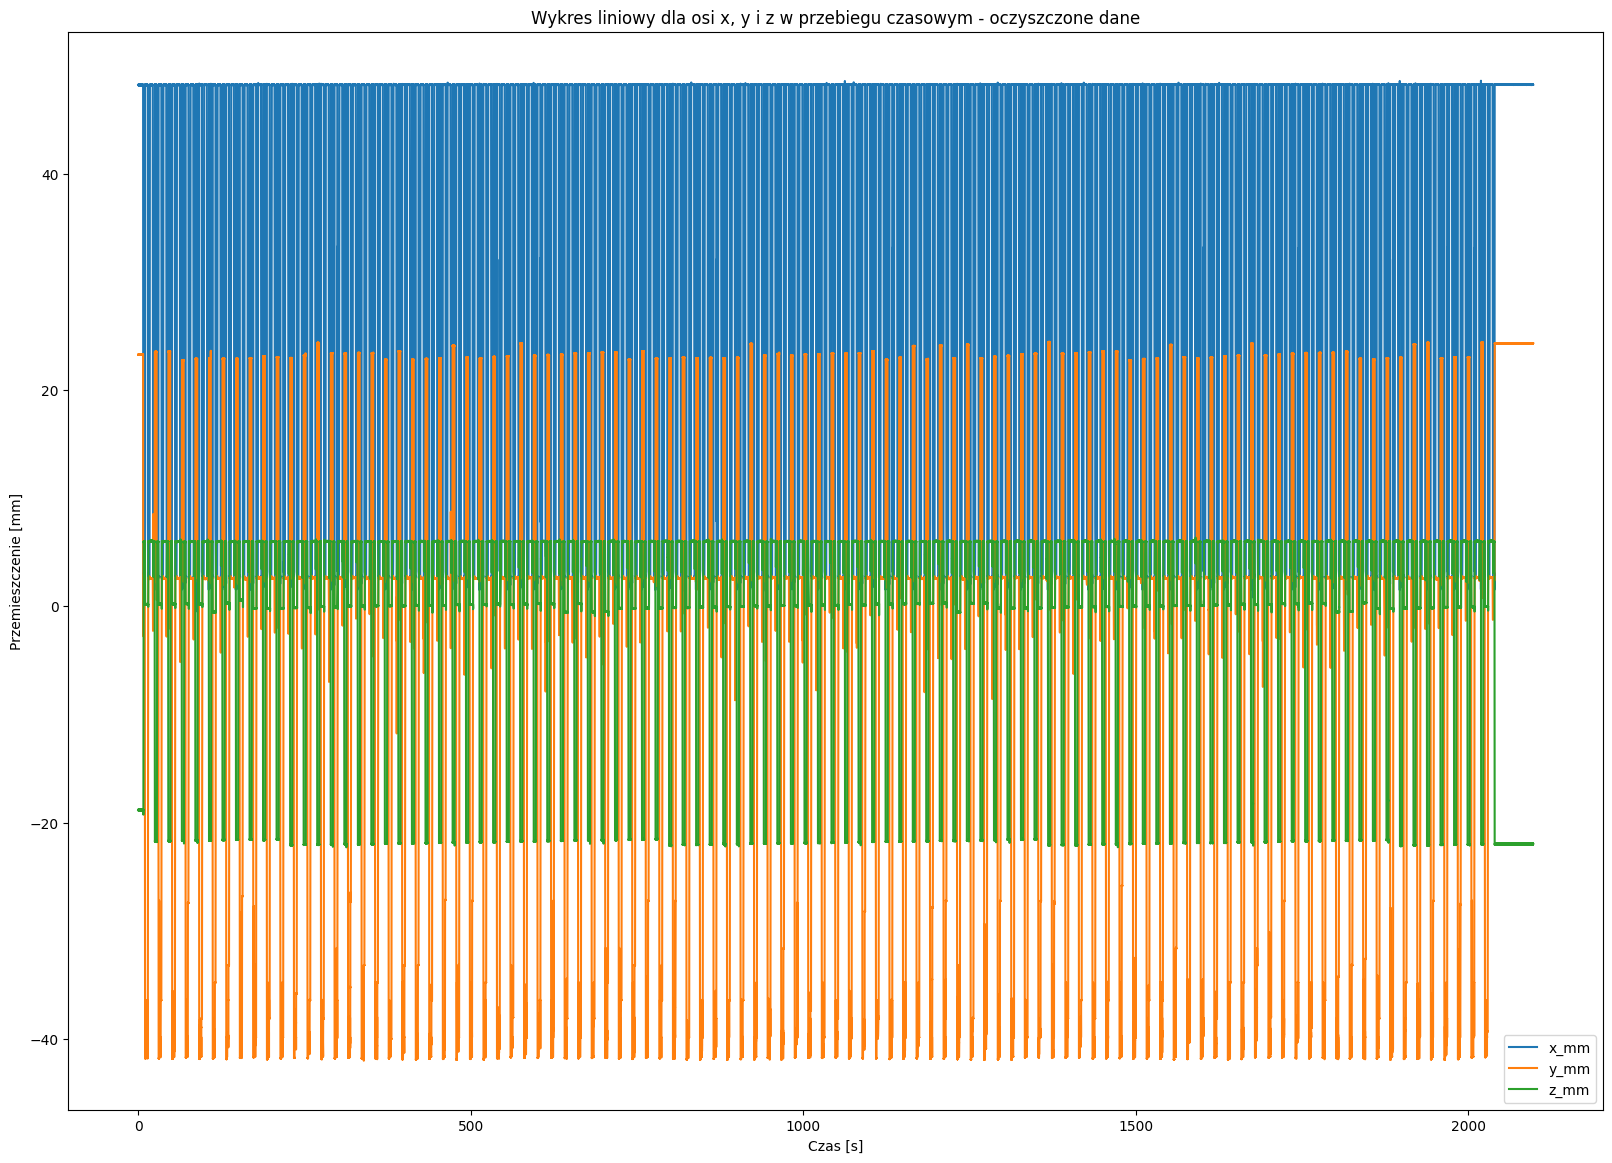

In [148]:
fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)

plt.plot(df_cleaned['t_s'], df_cleaned['x_mm'], label='x_mm')
plt.plot(df_cleaned['t_s'], df_cleaned['y_mm'], label='y_mm')
plt.plot(df_cleaned['t_s'], df_cleaned['z_mm'], label='z_mm')

# Ustawienie etykiet osi i tytułu
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [mm]')
plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym - oczyszczone dane')

# Dodanie legendy
plt.legend()

# Zapisanie wykresu jako SVG
plt.savefig('wykres_mm_cleaned.svg', format='svg', dpi=800)

# Wyświetlenie wykresu
plt.show()


In [149]:
# Zdefiniowanie oczekiwanych wartości dla PP dla każdej osi
PP_x_expected = 2.6097 # oczekiwana wartość dla osi x w mm
PP_y_expected = 2.4559 # oczekiwana wartość dla osi y w mm
PP_z_expected = 5.8720 # oczekiwana wartość dla osi z w mm

# Zdefiniowanie tolerancji dla każdej osi
tolerance_axis_mm = 2.0  # tolerancja w mm

# Określenie czasu postoju w sekundach
break_s = 2.0  # czas postoju 2 sekundy

# Tolerancja czasu postouju 
tolerance_break = 0.8 

# Obliczenie liczby próbek potrzebnych do uzyskania czasu postoju
samples_per_break = int(break_s * samples_rate * tolerance_break)  # częstotliwość próbkowania 500 Hz

# Funkcja do wykrywania punktów pomiarowych (PP)
def detect_PP(df, expected_value, tolerance, samples_per_break):
    # Inicjalizacja listy przechowującej momenty czasowe PP
    PP_times = []
    
    # Początkowy indeks czasu
    i = 0
    
    # Przeszukiwanie danych w poszukiwaniu punktów pomiarowych (PP)
    while i < len(df):
        # Sprawdzenie, czy wystarczająco dużo danych do analizy połowy czasu postoju
        if i + samples_per_break < len(df):
            # Wybór fragmentu danych na podstawie połowy czasu postoju
            window = df.iloc[i:i + samples_per_break]
            
            # Sprawdzenie, czy średnie wartości w tolerancji w oknie czasowym
            if ((window['x_mm'].mean() - expected_value['x']) <= tolerance and
                (window['y_mm'].mean() - expected_value['y']) <= tolerance and
                (window['z_mm'].mean() - expected_value['z']) <= tolerance):
                # Jeżeli warunek spełniony, zapamiętaj czas środkowy okna jako PP
                PP_times.append(window['t_s'].iloc[int(samples_per_break / 2)])
                
                # Przesuń się o co najmniej połowę czasu postoju przed szukaniem następnego PP
                i += samples_per_break
            
            # W przeciwnym razie, przesuń się o jeden krok
            else:
                i += 1
        else:
            break
    
    return PP_times

# Wykrycie punktów pomiarowych (PP) dla każdej osi
PP_times = detect_PP(df_cleaned, {'x': PP_x_expected, 'y': PP_y_expected, 'z': PP_z_expected}, tolerance_axis_mm, samples_per_break)

# Wyświetlenie znalezionych PP
print(f"Znalezione punkty pomiarowe (PP):\n{PP_times}")

Znalezione punkty pomiarowe (PP):
[8.654, 15.724, 23.252, 29.016, 36.07, 43.602, 49.372, 56.426, 63.968, 69.714, 76.772, 84.284, 90.064, 97.128, 104.636, 110.424, 117.49, 124.976, 130.796, 137.83, 145.338, 151.132, 158.188, 165.71, 171.484, 178.544, 186.07, 191.858, 198.89, 206.42, 212.208, 219.244, 226.766, 232.562, 239.598, 247.124, 252.902, 259.944, 267.482, 273.248, 280.306, 287.838, 293.604, 300.652, 308.196, 313.952, 321.012, 328.526, 334.302, 341.356, 348.886, 354.668, 361.712, 369.228, 375.004, 382.06, 389.572, 395.354, 402.422, 409.954, 415.702, 422.766, 430.298, 436.068, 443.12, 450.662, 456.4, 463.472, 470.964, 476.782, 483.818, 491.366, 497.136, 504.178, 511.668, 517.494, 524.526, 532.048, 537.85, 544.886, 552.386, 558.192, 565.23, 572.74, 578.544, 585.578, 593.074, 598.896, 605.928, 613.458, 619.266, 626.284, 633.816, 639.596, 646.64, 654.172, 659.938, 666.998, 674.508, 680.316, 687.34, 694.86, 700.644, 707.704, 715.236, 721.006, 728.056, 735.574, 741.352, 748.414, 755.912

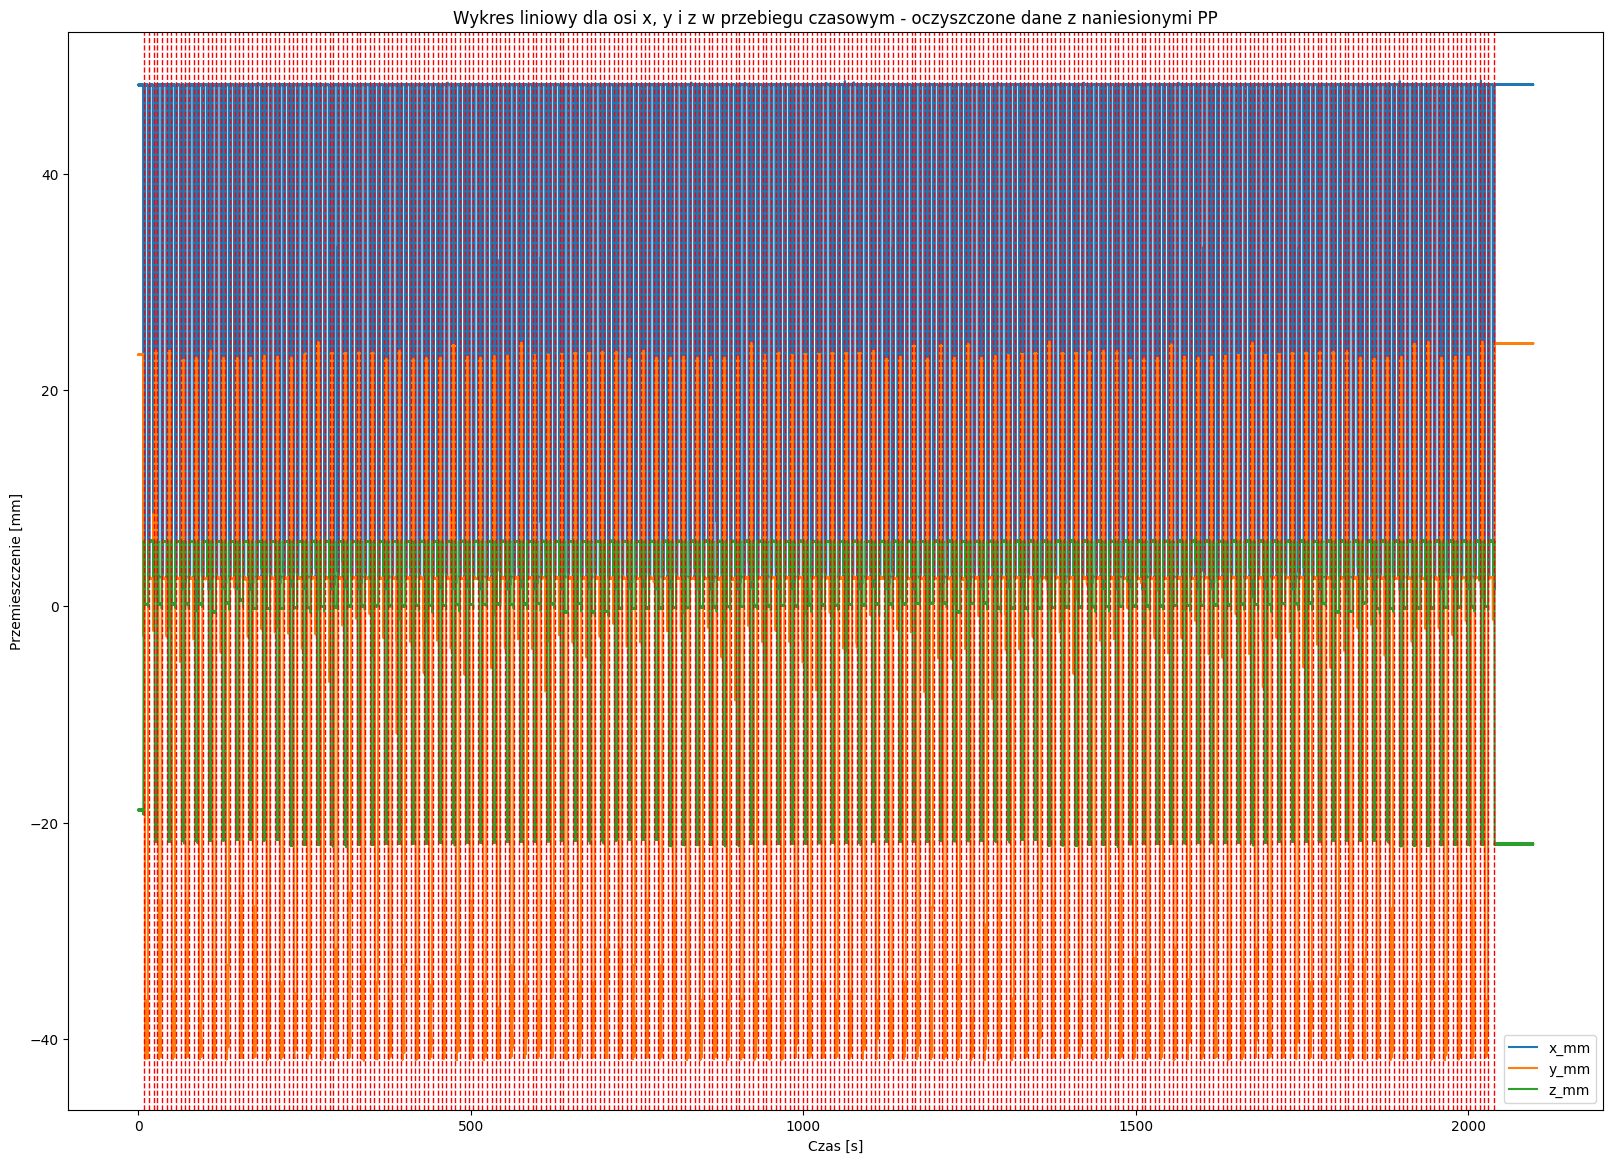

In [150]:
# Ustawienie rozmiaru figury w milimetrach (rozmiar A4 poziomo)
scale = 15
fig = plt.figure(figsize=(297/scale, 210/scale))  # 297mm x 210mm (A4 poziomo)

# Wykresy dla osi x, y i z
plt.plot(df_cleaned['t_s'], df_cleaned['x_mm'], label='x_mm')
plt.plot(df_cleaned['t_s'], df_cleaned['y_mm'], label='y_mm')
plt.plot(df_cleaned['t_s'], df_cleaned['z_mm'], label='z_mm')

# Dodanie pionowych linii dla punktów pomiarowych (PP)
for pp_time in PP_times:
    plt.axvline(x=pp_time, color='r', linestyle='--', linewidth=1)

# Ustawienie etykiet osi i tytułu
plt.xlabel('Czas [s]')
plt.ylabel('Przemieszczenie [mm]')
plt.title('Wykres liniowy dla osi x, y i z w przebiegu czasowym - oczyszczone dane z naniesionymi PP')

# Dodanie legendy
plt.legend()

# Zapisanie wykresu jako SVG
plt.savefig('wykres_mm_cleaned_with_PP.svg', format='svg', dpi=800)

# Wyświetlenie wykresu
plt.show()

In [151]:
print(len(PP_times))

300
